In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings ('ignore')


Using TensorFlow backend.


In [2]:
data=pd.read_csv(r"C:\CodSoft Tasks\Task3-Fraud\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.describe


<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [4]:
#checking null values
null=data.isnull().count()


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Dealing with Outliers
numeric_columns = data.select_dtypes (include=[np.number]).columns.tolist()
feature_mean = data [numeric_columns].mean()
feature_std = data [numeric_columns].std()
z_scores = np.abs((data [numeric_columns] - feature_mean) / feature_std)
outliers = (z_scores > 3).any(axis=1)
data = data[outliers]
data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
38,29.0,0.996370,-0.122589,0.546819,0.706580,0.134560,1.156995,-0.294561,0.407429,0.337863,...,-0.076302,0.108867,0.162231,-0.575624,0.109795,0.373813,0.050552,0.005106,20.53,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0


In [7]:
#selecting dependent and independent variable
X = data.drop(['Class'],axis=1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80
38,29.0,0.996370,-0.122589,0.546819,0.706580,0.134560,1.156995,-0.294561,0.407429,0.337863,...,-0.203461,-0.076302,0.108867,0.162231,-0.575624,0.109795,0.373813,0.050552,0.005106,20.53
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,-0.001980,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77


In [8]:
Y = data.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
#Labeling the target variable
Le = LabelEncoder()
Y = Le.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
#Splitting the dataset
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0) 

In [11]:
#ANN MODEL
model = Sequential()
model.add(Dense (64, input_dim = X_train.shape [1], activation ='relu')) # Input layer with 64 units and ReLU activation
model.add(Dense (32, activation ='relu')) # Hidden layer with 32 units and ReLU activation
model.add(Dense (32, activation ='relu'))
model.add(Dense (1, activation ='sigmoid')) # Output layer with 1 unit for binary classification (sigmoid activation)
model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30,batch_size=16, validation_split=0.2)
#Adjust epochs and batch size as needed   


# Evaluate the model
accuracy = model.evaluate(X_test, y_test) [1]
print (f'Accuracy: {accuracy*100:.2f}%')

Train on 24232 samples, validate on 6059 samples
Epoch 1/30
24232/24232 [==============================] - 4s 146us/step - loss: 27.5065 - accuracy: 0.9761 - val_loss: 2.4897 - val_accuracy: 0.9875
Epoch 2/30
24232/24232 [==============================] - 3s 118us/step - loss: 10.5201 - accuracy: 0.9764 - val_loss: 5.8816 - val_accuracy: 0.9868
Epoch 3/30
24232/24232 [==============================] - 3s 106us/step - loss: 7.4618 - accuracy: 0.9773 - val_loss: 1.2938 - val_accuracy: 0.9883
Epoch 4/30
24232/24232 [==============================] - 3s 104us/step - loss: 6.5136 - accuracy: 0.9760 - val_loss: 12.7636 - val_accuracy: 0.9868
Epoch 5/30
24232/24232 [==============================] - 3s 109us/step - loss: 5.7839 - accuracy: 0.9773 - val_loss: 1.8297 - val_accuracy: 0.9884
Epoch 6/30
24232/24232 [==============================] - 2s 103us/step - loss: 4.7264 - accuracy: 0.9763 - val_loss: 7.7837 - val_accuracy: 0.9868
Epoch 7/30
24232/24232 [==============================] - 2s

In [12]:
#ANN MODEL EVALUATION
y_pred = model.predict_classes(X_test)
confusion = confusion_matrix(y_test,y_pred)
print("Confusion Matrix for ANN Model:")
print(confusion)

Confusion Matrix for ANN Model:
[[7457   20]
 [  57   39]]


In [13]:
report=classification_report(y_test,y_pred)
print("\n Classisfication Report for ANN Model")
print(report)


 Classisfication Report for ANN Model
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7477
           1       0.66      0.41      0.50        96

    accuracy                           0.99      7573
   macro avg       0.83      0.70      0.75      7573
weighted avg       0.99      0.99      0.99      7573



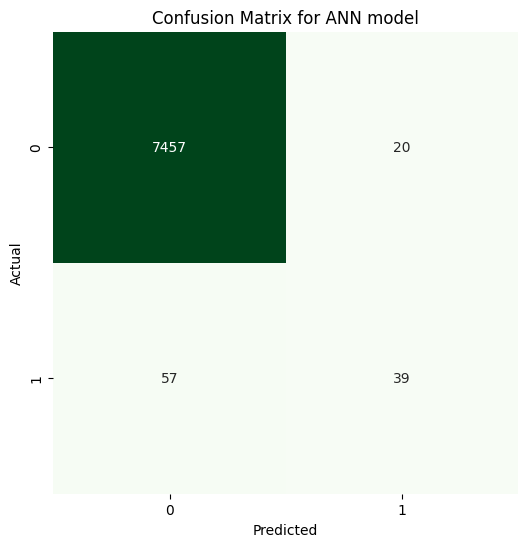

In [14]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [15]:
#MLP CLASSIFIER
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [16]:
#MLP Model Evaluation
accuracy = mlp.score(X_test,y_test)
print(f'Accuracy:{accuracy*100: .2f}%')


Accuracy: 98.88%


In [17]:
y_pred = mlp.predict(X_test)

In [18]:
report = classification_report(y_test,y_pred)
print("Classification Report for MLP Classifier :\n",report)

Classification Report for MLP Classifier :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7477
           1       0.76      0.17      0.27        96

    accuracy                           0.99      7573
   macro avg       0.88      0.58      0.63      7573
weighted avg       0.99      0.99      0.99      7573



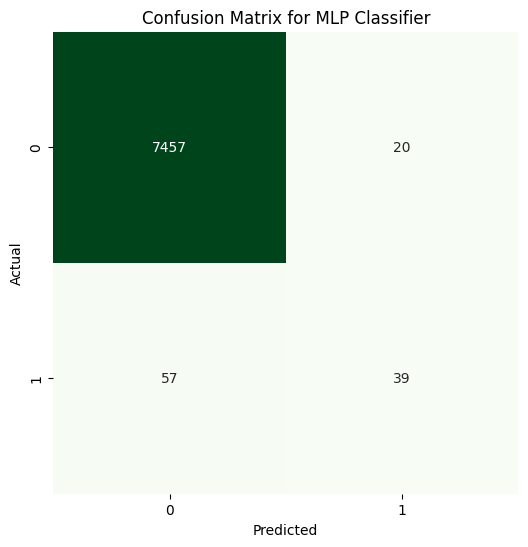

In [19]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()